In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

df=pd.read_csv('JaipurFinalCleanData.csv',index_col='date' ,parse_dates=True)
df=df.dropna()
df.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,1006.00,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,1007.94,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,1008.39,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,1007.62,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0


In [4]:
print('Shape of data',df.shape)

Shape of data (676, 39)


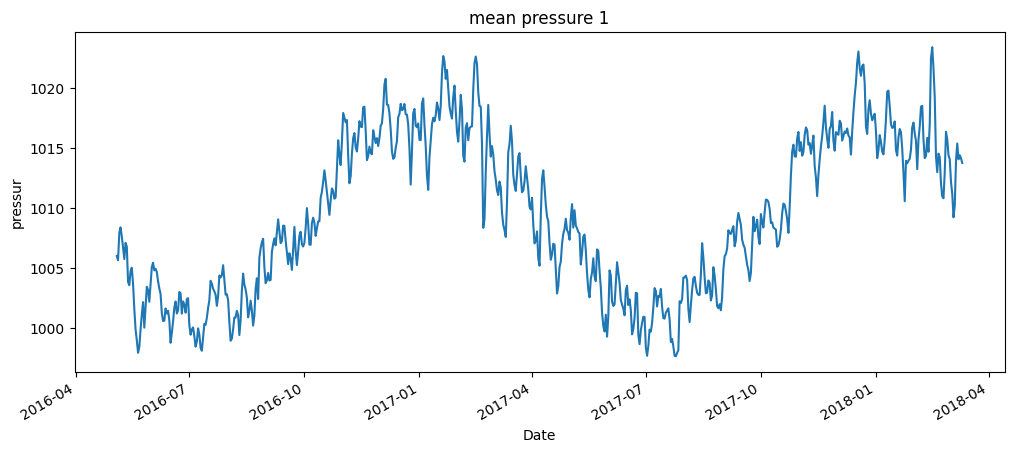

In [7]:
df['meanpressurem_1'].plot(figsize=(12, 5))
plt.title('mean pressure 1')
plt.xlabel('Date')
plt.ylabel('pressure')
plt.show()

In [8]:
# Preprocess the data
data = df['meanpressurem_1'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [9]:
sequence_length = 30

In [10]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, 0])
    y.append(data_scaled[i+sequence_length, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  #(number of samples, sequence length=30, number of features=1)

In [11]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X.shape[1], 1), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

21/21 [==============================] - 3s 8ms/step - loss: 0.1821
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0475
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 8/50
21/21 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 9/50
21/21 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 10/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 11/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 12/50
21/21 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 13/50
21/21 [=============================

In [13]:
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled).flatten()

21/21 [==============================] - 0s 4ms/step


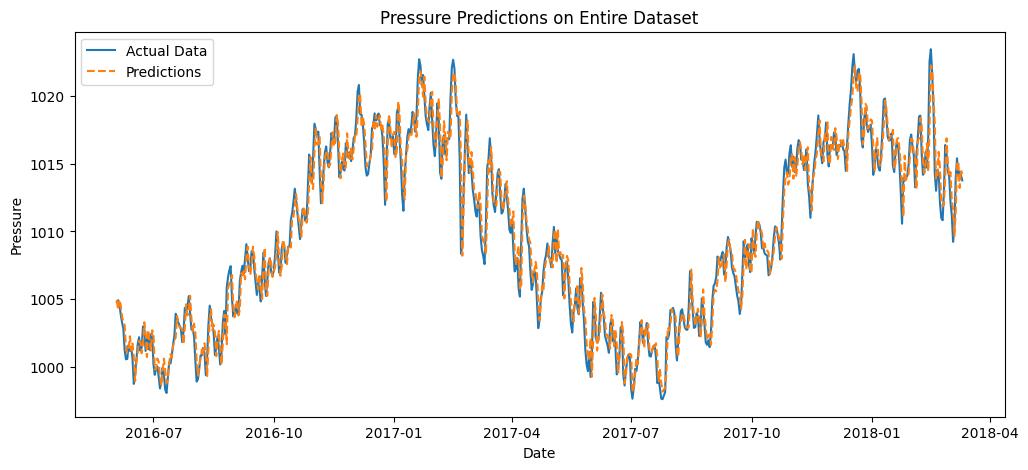

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df.index[sequence_length:], df['meanpressurem_1'][sequence_length:], label='Actual Data')
plt.plot(df.index[sequence_length:], predictions, label='Predictions', linestyle='dashed')
plt.title('Pressure Predictions on Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

actual_temps = df['meanpressurem_1'][sequence_length:].values
predicted_temps = predictions 

mse = mean_squared_error(actual_temps, predicted_temps)
rmse = sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.2497830099657006


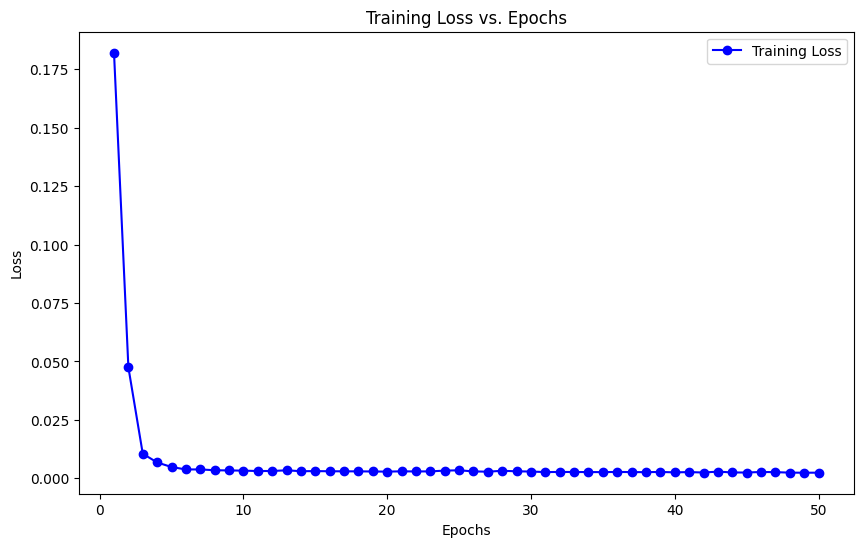

In [16]:
loss = history.history['loss']

# Extract the number of epochs
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()